# DNN model

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Importing the recquired packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import itertools
from numpy.random import seed

import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data into the dataframe

In [6]:
df_md = pd.read_csv("/content/drive/My Drive/CSV Files/Std_mdb.csv", index_col=[0])


In [7]:
df_md.drop(['sealevel','avgT','maxT','minT','slp','avgRH','PP','avgW','VM','CO2_percapita'], axis = 1 ,inplace=True)

### Splitting the data into training and testing sets

In [8]:
train , test = train_test_split(df_md, test_size = 0.20,random_state = 0)

In [9]:
x_train = train.drop('Std_sealevel', axis=1)
y_train = train['Std_sealevel']

x_test = test.drop('Std_sealevel', axis=1)
y_test = test['Std_sealevel']

In [10]:
seed(1)

Input layer: 7
Hidden Layer: 65
Output layer: 1

### Fitting the model

In [11]:
model = Sequential()
model.add(Dense(12, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, activation='elu'))
model.add(Dense(150, activation='elu'))
model.add(Dense(150, activation='elu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 150)               1950      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 47,485
Trainable params: 47,485
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [13]:
history = model.fit(x_train, y_train, epochs=500, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0956 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0590
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0507 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0347
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0334 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0317
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 8.8225e-04 - mse: 8.8225e-04 - mae: 0.0248 - val_loss: 6.1052e-04 - val_mse: 6.1052e-04 - val_mae: 0.0198
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 4.9031e-04 - mse: 4.9031e-04 - mae: 0.0173 - val_loss: 3.6297e-04 - val_mse: 3.6297e-04 - val_mae: 0.0151
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 2.5302e-04 - mse: 2.5302e-04 - mae: 0.0127 - val_loss: 1.6208e-04 - val_mse: 1.6208e-04 - v

### Utilizing the model to generate predictions

In [14]:
predict = model.predict(x_test)

### Calculating the r-squared, adjusted r-squared and the RMSE of the model

In [15]:
r21 = r2_score(y_test,predict).round(3)
print(f"The r-squared value of the new fit is", r21)
p = len(x_train.columns) 
n = len(x_train)
r21_adj = 1 - ((1-r21) * (n-1) / (n-p-1))
rms = sqrt(mean_squared_error(y_test, predict))
print(f"The adjusted r-squared value of the new fit is", r21_adj)
print(f'The RMSE value of the fit is',rms)

The r-squared value of the new fit is 0.927
The adjusted r-squared value of the new fit is 0.9261461988304094
The RMSE value of the fit is 0.0034022203085329735


### Diagnostic Plots 

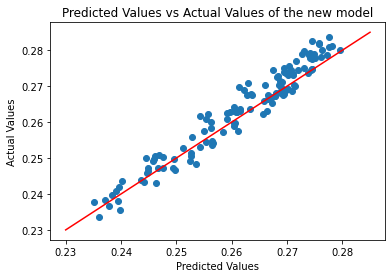

In [16]:
plt.scatter(predict,y_test)
x = np.linspace(0.23,0.285,1000)
plt.plot(x,x, linestyle = 'solid', color = "red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted Values vs Actual Values of the new model")
plt.show()

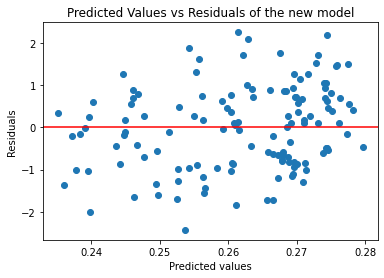

In [17]:
res = y_test - list(itertools.chain.from_iterable(predict.tolist()))
res_stand = (res - res.mean())/res.std()
plt.scatter(predict, res_stand )
plt.axhline(y = 0, color = 'red' )
plt.title("Predicted Values vs Residuals of the new model")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()